In [456]:
import pandas as pd

Reading data from excel

In [457]:
undata_HDI=pd.read_excel("UNdata.xlsx",sheetname=0)

In [458]:
undata_cont=pd.read_excel("UNdata.xlsx", sheetname=5)

Merging data from HDI sheet and cont sheet

In [459]:
undata_final=pd.merge(undata_HDI,undata_cont,left_on=undata_HDI.iloc[:,0],right_on=undata_cont.iloc[:,0],how='inner')

Exploring data types to see is any variable has a wrong data type

In [460]:
undata_final.dtypes

country          object
HDI             float64
LifeExp         float64
Edu             float64
GNI_PC            int64
HDI_NI          float64
Country Name     object
CONTINENT        object
dtype: object

Changing data types as needed

In [461]:
undata_final.GNI_PC=undata_final.GNI_PC.astype('float64')

In [462]:
undata_final.country=undata_final.country.astype('category')

In [463]:
undata_final.CONTINENT=undata_final.CONTINENT.astype('category')

In [464]:
undata_final.dtypes

country         category
HDI              float64
LifeExp          float64
Edu              float64
GNI_PC           float64
HDI_NI           float64
Country Name      object
CONTINENT       category
dtype: object

Adding a new column 'Edulevel' which signifies Education level

In [465]:
undata_final['Edulevel']=undata_final['Edu'].astype('int64')

In [466]:
undata_final.dtypes

country         category
HDI              float64
LifeExp          float64
Edu              float64
GNI_PC           float64
HDI_NI           float64
Country Name      object
CONTINENT       category
Edulevel           int64
dtype: object

In [467]:
%matplotlib inline

In [468]:
import seaborn as sns

In [469]:
import numpy as np

In [470]:
undata_final.head()

,country,HDI,LifeExp,Edu,GNI_PC,HDI_NI,Country Name,CONTINENT,Edulevel
0,Australia,0.938,82.0,12.0,34340.0,0.978,Australia,Australia,12
1,Netherlands,0.921,80.8,11.6,37282.0,0.945,Netherlands,Europe,11
2,Germany,0.920,80.6,12.2,35431.0,0.948,Germany,Europe,12
3,Ireland,0.916,80.7,11.6,28671.0,0.960,Ireland,Europe,11
4,Sweden,0.916,81.6,11.7,36143.0,0.940,Sweden,Europe,11


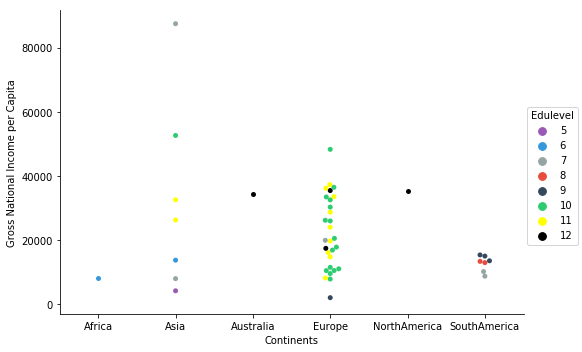

In [471]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#ffff00","#000000"]
a=sns.factorplot(x='CONTINENT', y='GNI_PC',hue='Edulevel', data=undata_final.iloc[:,[4,7,8]],size=5,legend_out=True,kind='swarm'
                  ,aspect=1.5,palette=colors)
a.set_axis_labels("Continents","Gross National Income per Capita")